In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models,datasets
import numpy as np
from random import sample
import matplotlib.pyplot as plt

In [2]:
# Loading the data and performing the data, split between train and test sets
(train_images,train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [3]:
Classes = 10
Input_shape = (28,28,1)

In [4]:
# random shuffling the data
def shuffle(x,y):
  rand = sample(range(x.shape[0]), x.shape[0])
  return x[rand], y[rand]

# Normalization scales images to the [-1, 1] range
def Normal(train_x):
  train_x_1 = (train_x.astype("float32")-127.5)/127.5
  return train_x_1

# Reshape adds a depth layer because in mnist there is a single depth splice in the datasets
def Reshape(x):
  x = x.reshape(x.shape[0], 28,28,1).astype("float32")
  return x

In [5]:
train_images, train_labels = shuffle(train_images, train_labels)
test_images, test_labels = shuffle(test_images, test_labels)

train_images = Normal(train_images)
test_images = Normal(test_images)

train_images = Reshape(train_images)
test_images = Reshape(test_images)

# convert class vectors to binary class matrices
print(train_labels.shape)
print(train_labels[0])
train_labels = keras.utils.to_categorical(train_labels,Classes)
test_labels = keras.utils.to_categorical(test_labels, Classes)
print(train_labels.shape)
print(train_labels[0])

(60000,)
7
(60000, 10)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


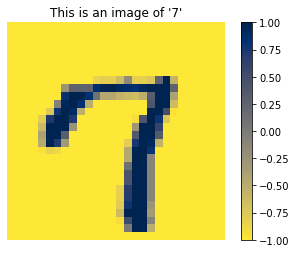

In [6]:
plt.figure()
plt.imshow(train_images[0, : ,: ,0], cmap = plt.cm.cividis_r)
plt.axis("off")
plt.colorbar()
plt.title("This is an image of '{}'".format(np.argmax(train_labels[0])))
plt.show()

In [7]:
# Create Model
"""def model():
  model = models.Sequential()
  model.add(layers.Conv2D(32, 3,strides = 2, padding = "same",
                          input_shape = Input_shape))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())
  
  model.add(layers.Conv2D(64,3,strides = 2,padding= "same"))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())
  model.add(layers.MaxPool2D((2,2)))

  model.add(layers.Conv2DTranspose(64, 3, strides = 1, padding = "same"))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

  model.add(layers.Conv2DTranspose(32 , 3, strides = 1, padding = "same"))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

  model.add(layers.Conv2D(32,3,strides = 1))
  model.add(layers.LeakyReLU())

  model.add(layers.Flatten())
  model.add(layers.Dense(128))
  model.add(layers.LeakyReLU())
  model.add(layers.Dense(10))

  return model"""
def model():
  # shape of input image is(28,28,1)
  input_images = keras.Input(shape = Input_shape)
  x = input_images 
 
  filter = [32,64]
  
  i = 0
  for f in filter:
    x = layers.Conv2D(f,3,strides = 2,padding = "same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)
    if i>0 and i//2 == 0:
      x = layers.MaxPool2D((2,2))
  
  filter = [64,32]
  for f in filter:
    x = layers.Conv2DTranspose(f,3,1,padding = "same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)
  
  x = layers.Conv2D(32,3,strides = 2,padding = "valid")(x)
  x = layers.Dropout(0.3)(x)
  x = layers.Conv2D(32, 3,1,padding = "valid")(x)
  x = layers.Flatten()(x)
  x = layers.Dense(128)(x)
  x = layers.LeakyReLU()(x)
  outputs = layers.Dense(10)(x)

  return tf.keras.Model(input_images, outputs)
  
  


In [8]:
model_1 = model()
model_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 32)        128       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 64)          256       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 64)          0     

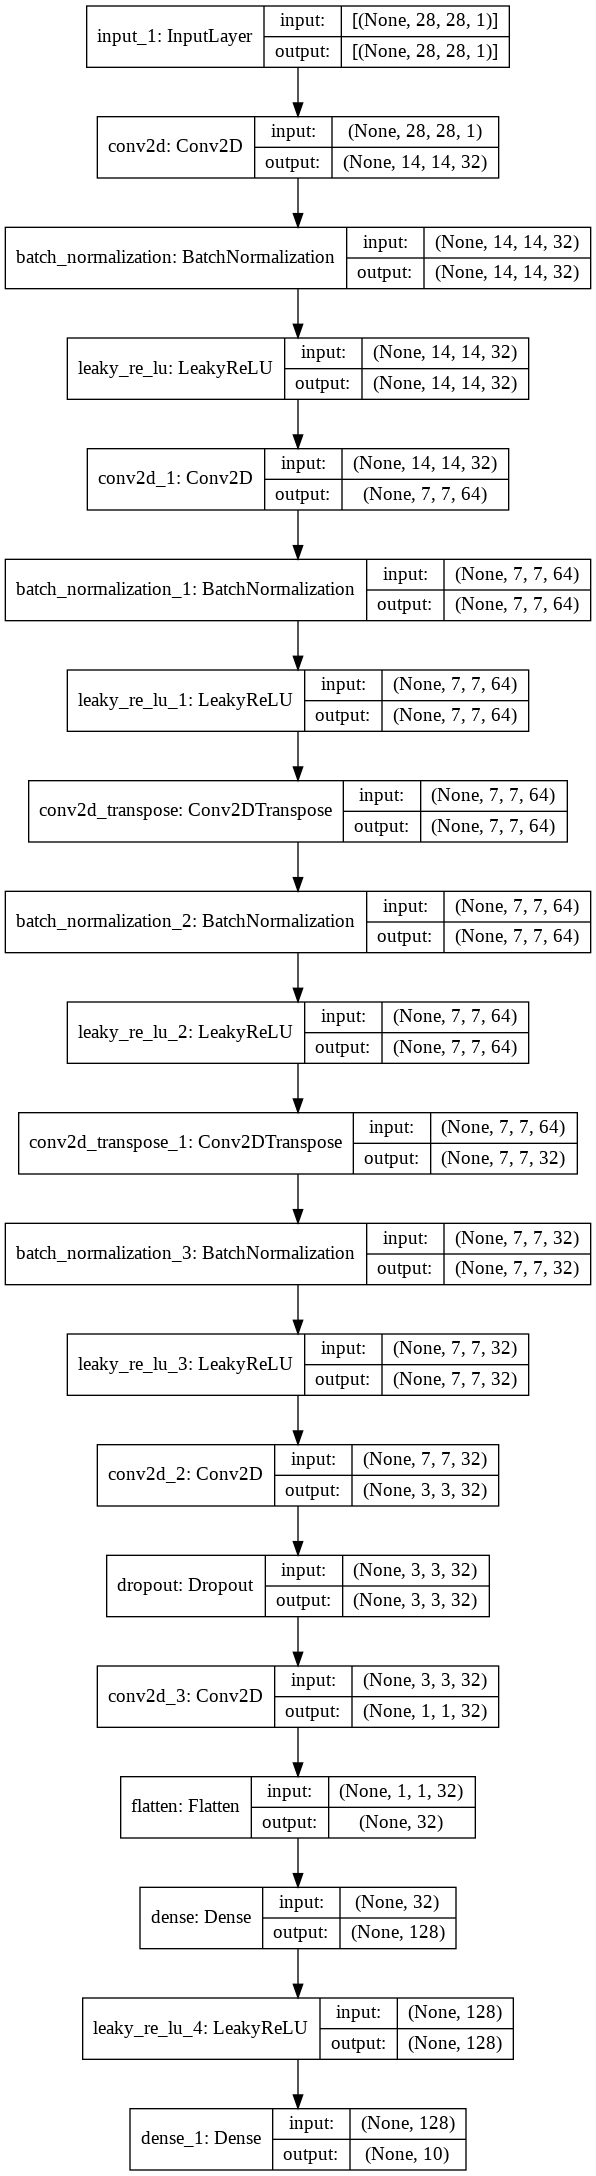

In [9]:
tf.keras.utils.plot_model(model_1, show_shapes= True)

In [10]:
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.CategoricalCrossentropy(from_logits= True)
model_1.compile(optimizer=optimizer, loss= loss,
              metrics = ['accuracy'])

In [11]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28, 1)
(60000, 10)


In [12]:
history = model_1.fit(train_images, train_labels,epochs=15, batch_size = 128,
            validation_split = 0.3)

Epoch 1/15
329/329 [==============================] - 44s 131ms/step - loss: 0.2500 - accuracy: 0.9231 - val_loss: 0.1106 - val_accuracy: 0.9688
Epoch 2/15
329/329 [==============================] - 43s 132ms/step - loss: 0.0850 - accuracy: 0.9719 - val_loss: 0.0849 - val_accuracy: 0.9744
Epoch 3/15
329/329 [==============================] - 44s 133ms/step - loss: 0.0658 - accuracy: 0.9789 - val_loss: 0.0798 - val_accuracy: 0.9769
Epoch 4/15
329/329 [==============================] - 44s 134ms/step - loss: 0.0535 - accuracy: 0.9832 - val_loss: 0.0677 - val_accuracy: 0.9803
Epoch 5/15
329/329 [==============================] - 45s 136ms/step - loss: 0.0481 - accuracy: 0.9848 - val_loss: 0.0577 - val_accuracy: 0.9825
Epoch 6/15
329/329 [==============================] - 43s 131ms/step - loss: 0.0423 - accuracy: 0.9860 - val_loss: 0.0618 - val_accuracy: 0.9816
Epoch 7/15
329/329 [==============================] - 44s 133ms/step - loss: 0.0372 - accuracy: 0.9875 - val_loss: 0.0594 - val_ac

 10/313 [..............................] - ETA: 3s - loss: 0.0642 - accuracy: 0.9844

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


313/313 [==============================] - 4s 13ms/step - loss: 0.0490 - accuracy: 0.9864
The accuracy is :  98.64 %


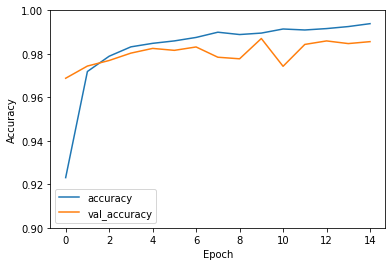

In [13]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9,1])
plt.legend(loc = 'lower_right')

test_loss, test_acc = model_1.evaluate(test_images, test_labels)
print("The accuracy is : {: 0.2f} %".format(100*test_acc))

In [14]:
prediction_model = tf.keras.Sequential([model_1, layers.Softmax()])
predictions = prediction_model.predict(test_images)

print(np.argmax(predictions[1]))
print(np.argmax(test_labels[1]))
print(predictions[1])

9
9
[2.8689934e-11 2.5172531e-08 2.0798219e-09 2.1413777e-07 3.7758175e-05
 2.3903440e-06 9.6844407e-13 2.4071018e-05 1.0200852e-08 9.9993551e-01]


In [15]:
def plot_image(i, predictions_array, true_label, img):
  img = img[i]
  true_label = np.argmax(true_label[i])
  plt.imshow(img[:,:,0], cmap = plt.cm.cividis_r)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  predicted_label = np.argmax(predictions_array)
  
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("Prediction = {} {:2.0f}% true = {}".format(predicted_label,
                                       100*np.max(predictions_array),
                                       true_label,color=color))
  
def plot_value_array (i, predictions_array, true_label):
  true_label = np.argmax(true_label[i])
  predicted_label = np.argmax(predictions_array)

  plt.grid(False)
  plt.yticks([])
  plt.ylabel('% Prediction')
  plt.xticks(range(10))
  plt.ylim([0,1])
  plt.xlabel('Class')
  this_plot = plt.bar(range(10), predictions_array, color = "#777777")
  this_plot[predicted_label].set_color('red')
  this_plot[true_label].set_color('blue')

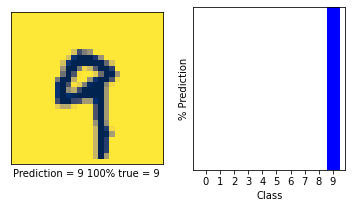

In [16]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)

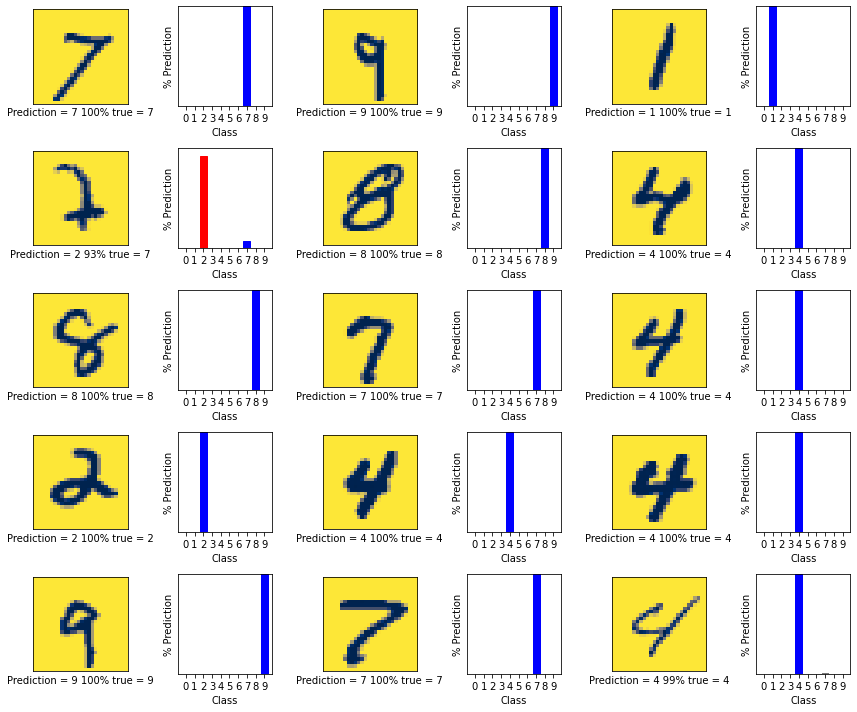

In [17]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1) 
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [25]:
i = 190
image_1 = test_images[i]
print(image_1.shape)
image_1 = tf.expand_dims(image_1,0)
print(image_1.shape)
predict = prediction_model(image_1)

(28, 28, 1)
(1, 28, 28, 1)


In [28]:
print(np.argmax(predict))
print(np.argmax(test_labels[i]))

2
2
